In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("cleaned_netflix.csv")
  # if your file is directly in the folder
# OR, if it's inside the "data" folder, use:
# df = pd.read_csv("data/netflix_titles.csv")

# Show shape and first few rows
print("Rows, Columns:", df.shape)
df.head()


Rows, Columns: (8807, 13)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2020
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2020
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2020
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2020


In [4]:
# Check column names, data types, and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  decade        8807 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 894.6+ KB


In [ ]:
# Summary statistics for both numbers and text
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8804,15-Aug,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,1-Jan-20,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Count missing values per column
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# --- Cleaning ---

# 1. Remove duplicate rows (if any)
df = df.drop_duplicates()

# 2. Handle missing values
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # convert to datetime

# 3. Standardize column names (lowercase, no spaces)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Show cleaned info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  decade        8807 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 894.6+ KB


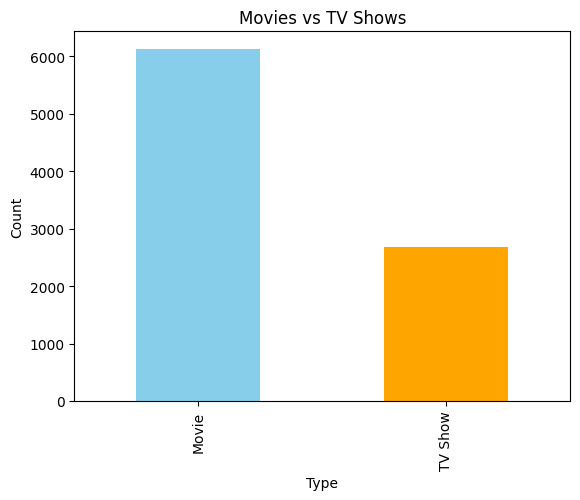

In [ ]:
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar', title='Movies vs TV Shows', color=['skyblue','orange'])
plt.xlabel("Type")
plt.ylabel("Count")
plt.savefig("movies_vs_tv.png", dpi=160, bbox_inches="tight")
plt.show()



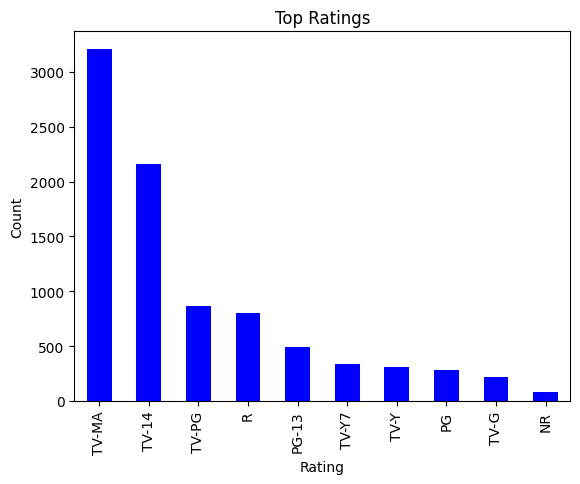

In [13]:
df['rating'].value_counts().head(10).plot(kind='bar', title='Top Ratings', color='blue')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("top_ratings.png", dpi=160, bbox_inches="tight")
plt.show()


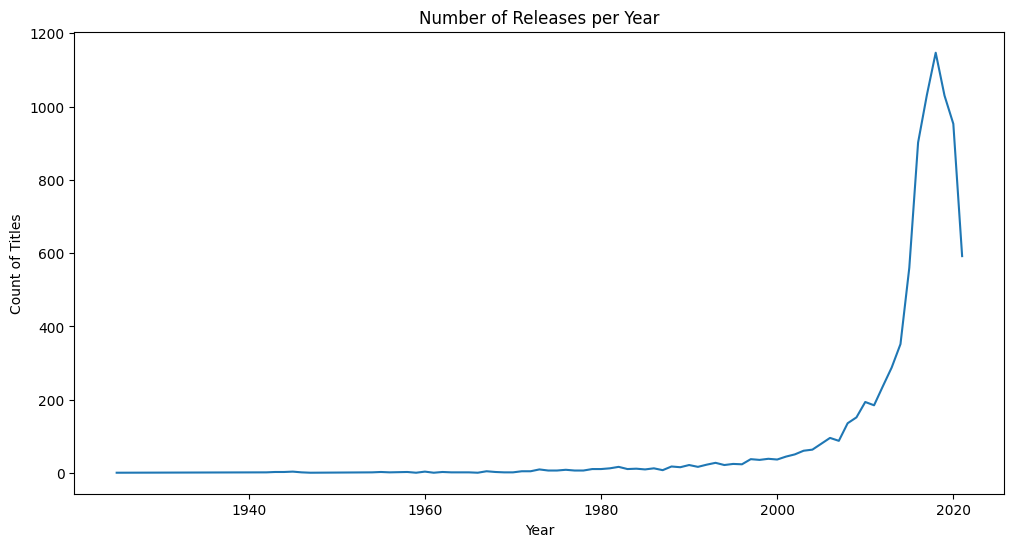

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6), title='Number of Releases per Year')
plt.xlabel("Year")
plt.ylabel("Count of Titles")
plt.savefig("releases_per_year.png", dpi=160, bbox_inches="tight")
plt.show()


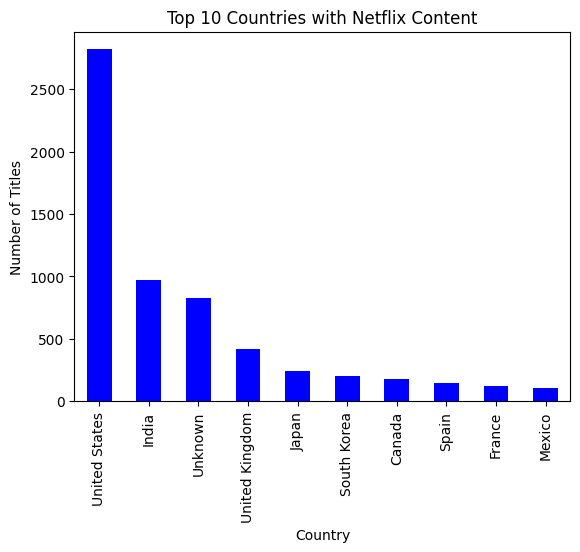

In [12]:
df['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Countries with Netflix Content', color='blue')
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()


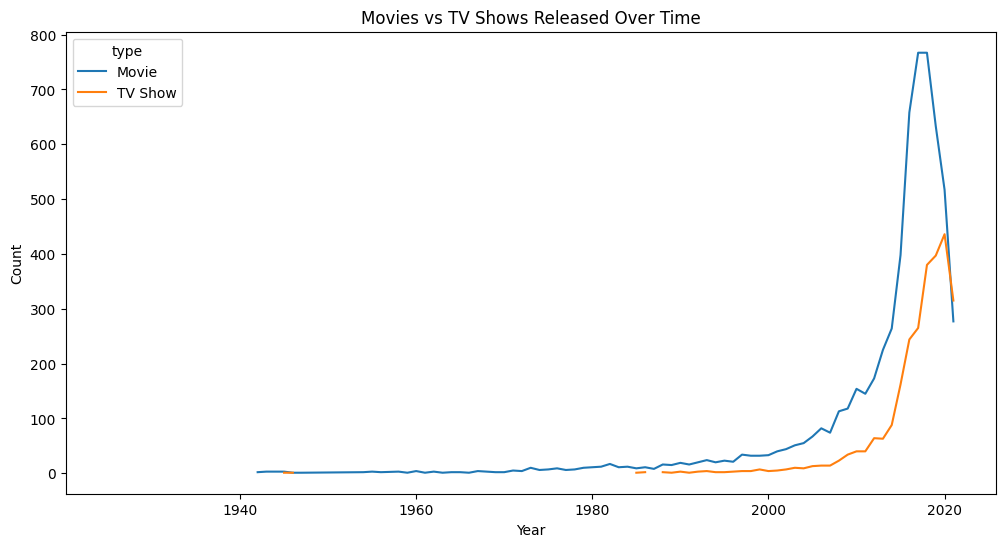

In [ ]:
df.groupby(['release_year','type']).size().unstack().plot(kind='line', figsize=(12,6))
plt.title("Movies vs TV Shows Released Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


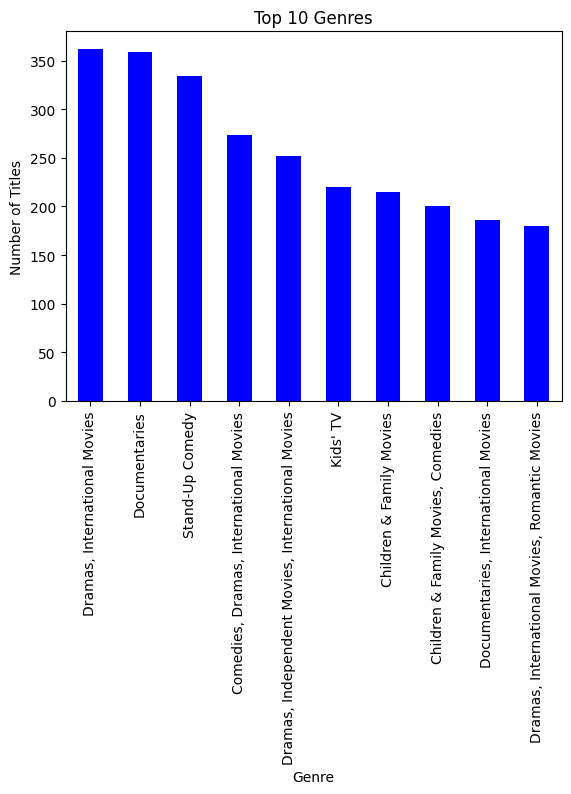

In [11]:
df['listed_in'].value_counts().head(10).plot(kind='bar', title='Top 10 Genres', color='blue')
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.show()


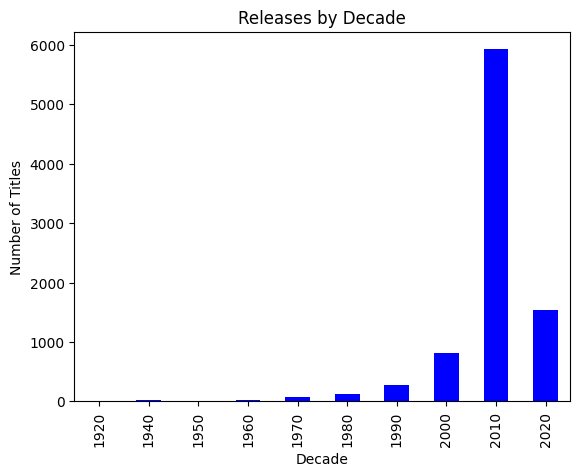

In [10]:
df['decade'] = (df['release_year']//10)*10
df['decade'].value_counts().sort_index().plot(kind='bar', title='Releases by Decade', color='blue')
plt.xlabel("Decade")
plt.ylabel("Number of Titles")
plt.show()


## Insights from Netflix Dataset (Task 2 - Exploratory Data Analysis)

1. **Movies dominate Netflix’s catalog** – Movies make up about 70% of the dataset, while TV Shows account for around 30%.  
2. **TV-MA is the most frequent rating**, showing that adult/mature content is the most widely available on the platform.  
3. **Releases increased significantly after 2015**, peaking around 2018, before slightly declining in later years.  
4. **United States and India are the leading contributors** of Netflix content, together producing the largest share of titles.  
5. **Drama, International Movies, and Comedies** are the most common genres on the platform.  
6. **Missing data** was common in the *director* and *cast* columns; these were filled with `"Unknown"` during cleaning.  
7. **Date added column** was converted to proper datetime format to enable time-based analysis.  

---

### Next Steps
- Compare Netflix’s catalog growth trend against competitors (Amazon Prime, Disney+).  
- Analyze the relationship between **duration** (minutes or seasons) and **ratings**.  
- Study Netflix’s regional focus by exploring **genre and country combinations**.  


In [ ]:
df.to_csv("cleaned_netflix.csv", index=False)


In [6]:
import os, matplotlib.pyplot as plt
os.makedirs("figures", exist_ok=True)   # where we'll save PNGs

def savefig(name):
    plt.tight_layout()
    plt.savefig(f"figures/{name}.png", dpi=160, bbox_inches="tight")
    plt.show()


In [ ]:
# === SETUP CELL ===
import pandas as pd
import matplotlib.pyplot as plt

# Load the CLEANED dataset (not the raw one)
df = pd.read_csv("cleaned_netflix.csv")

print("Dataset loaded:", df.shape)
df.head()


Dataset loaded: (8807, 13)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2020
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2020
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2020
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2020


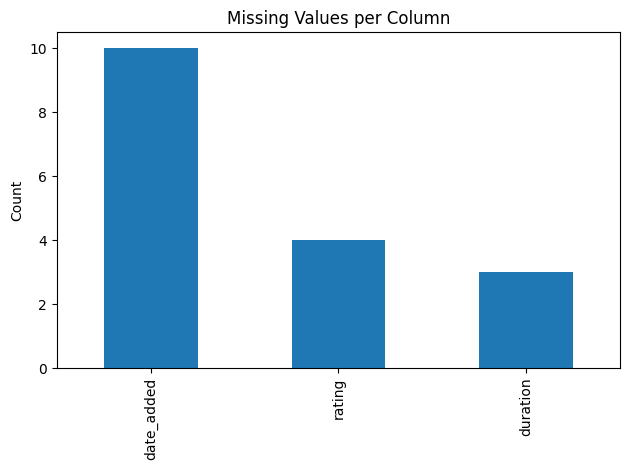

In [ ]:
import matplotlib.pyplot as plt
na = df.isna().sum().sort_values(ascending=False)
na[na>0].plot(kind='bar', title='Missing Values per Column')
plt.ylabel('Count'); plt.tight_layout(); plt.show()


In [ ]:
rating_type = df.pivot_table(index='rating', columns='type', values='show_id',
                             aggfunc='count', fill_value=0).sort_values('TV Show', ascending=False)
rating_type.head(12)


type,Movie,TV Show
rating,,
TV-MA,2062,1145
TV-14,1427,733
TV-PG,540,323
TV-Y7,139,195
TV-Y,131,176
TV-G,126,94
NR,75,5
R,797,2
TV-Y7-FV,5,1


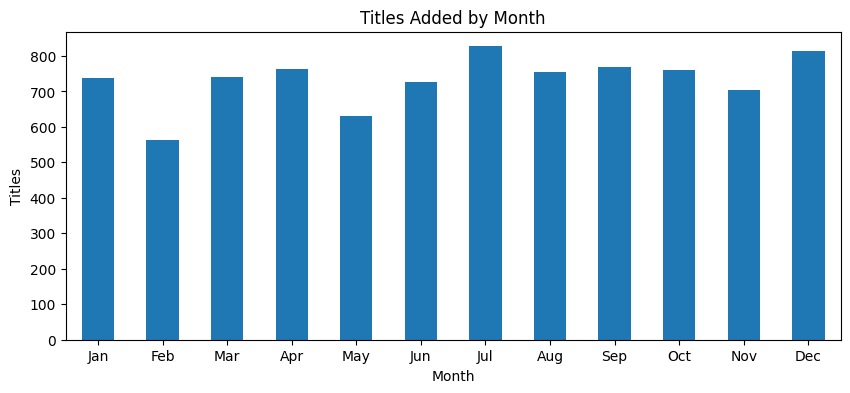

In [ ]:
import calendar

# make sure date_added is datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

m = df.dropna(subset=['date_added']).copy()
m['month'] = m['date_added'].dt.month

order = list(range(1, 13))
ax = (m['month'].value_counts()
                .reindex(order, fill_value=0)
                .plot(kind='bar', title='Titles Added by Month', figsize=(10,4)))
ax.set_xticklabels([calendar.month_abbr[i] for i in order], rotation=0)
plt.xlabel('Month'); plt.ylabel('Titles')
plt.show()




In [ ]:
share_tvma = (df['rating'].eq('TV-MA') & df['type'].eq('TV Show')).mean()
share_movie_tvma = (df['rating'].eq('TV-MA') & df['type'].eq('Movie')).mean()
share_tvma, share_movie_tvma


(np.float64(0.13001021914386285), np.float64(0.2341319405018735))